<a href="https://colab.research.google.com/github/kivvgsr/deep-learning/blob/main/image_classification_using__transform_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRANSFORM LEARNING**  : IN THIS LEARNING INSTED OF CREATING MORE NO OF CONVOLUTION LAYERS THAT TAKE MORE AMOUNT OF TIME FOR COMPUTATION . WE WILL TAKE ALREADY TRAINED MODEL AND FREEZE THE LAYES AND WE CHANGE SOME OUTER LAYERS . THIS IS CALLED AS TRANSFORM LEARNING.

example : with the help of car image classifier technique we can predict the image of lorry van truck .. etc

in this we took the google image classifier model . where is classified the images of n no of classes .


In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
!pip install keras

In [4]:
!pip install tensorflow

In [5]:
!pip install tensorflow.hub

In [6]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [7]:
from google.colab import files
uploaded = files.upload()
file_name = 'goldfish.jpg'
gold_fish = Image.open(file_name).resize(IMAGE_SHAPE)


Saving goldfish.jpg to goldfish (2).jpg


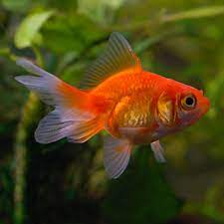

In [8]:
gold_fish

In [9]:
#lets perform the scalling operation
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [10]:
gold_fish

array([[[0.2627451 , 0.34117647, 0.05882353],
        [0.29019608, 0.37254902, 0.07843137],
        [0.32941176, 0.41568627, 0.12156863],
        ...,
        [0.31764706, 0.37647059, 0.        ],
        [0.31372549, 0.38039216, 0.        ],
        [0.30196078, 0.38039216, 0.00784314]],

       [[0.2627451 , 0.34117647, 0.0627451 ],
        [0.29019608, 0.36862745, 0.09019608],
        [0.33333333, 0.41960784, 0.13333333],
        ...,
        [0.3254902 , 0.38431373, 0.        ],
        [0.32156863, 0.38823529, 0.        ],
        [0.29019608, 0.36862745, 0.        ]],

       [[0.26666667, 0.34117647, 0.09019608],
        [0.29411765, 0.36862745, 0.10980392],
        [0.33333333, 0.41568627, 0.14509804],
        ...,
        [0.33333333, 0.39215686, 0.        ],
        [0.32941176, 0.39607843, 0.        ],
        [0.28627451, 0.35294118, 0.        ]],

       ...,

       [[0.04313725, 0.1254902 , 0.00392157],
        [0.04705882, 0.12156863, 0.00392157],
        [0.0627451 , 0

In [11]:
gold_fish[np.newaxis,...].shape # tis code is adding additional dimenssion


(1, 224, 224, 3)

In [12]:
result = classifier.predict(gold_fish[np.newaxis,...])

1/1 [==============================] - 3s 3s/step


In [13]:
result.shape

(1, 1001)

In [14]:
predicted_label_index = np.argmax(result)
predicted_label_index # argmax in the numpy module gives the index of the maximumvalue

2

#flowers data set

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [16]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/19551343814_48f764535f_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8980273068_cf7e8b880a_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2481428401_bed64dd043.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2625836599_03e192266f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/9726260379_4e8ee66875_m.jpg')]

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/18389368680_91c24a2087_z.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg'),
 PosixPath('datasets/flower_photos/roses/13235124703_a7e1266e44.jpg'),
 PosixPath('datasets/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/roses/2550860627_998a4fc4c1.jpg')]

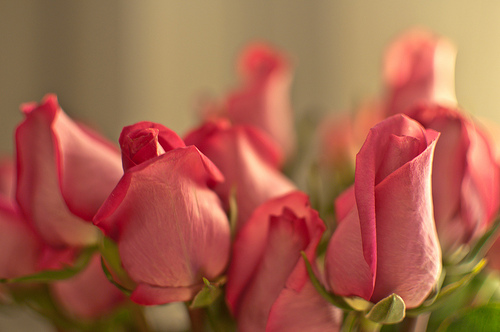

In [20]:
import PIL
PIL.Image.open(str(roses[1]))

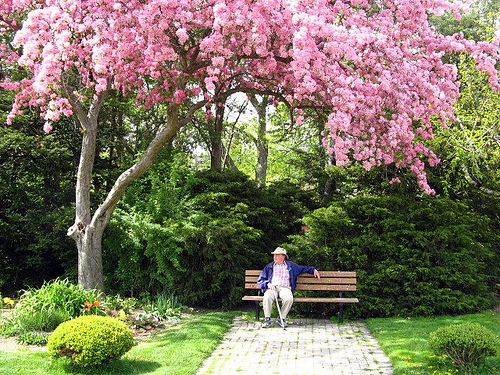

In [21]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [22]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [24]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/18389368680_91c24a2087_z.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg'),
 PosixPath('datasets/flower_photos/roses/13235124703_a7e1266e44.jpg'),
 PosixPath('datasets/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/roses/2550860627_998a4fc4c1.jpg')]

In [25]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/18389368680_91c24a2087_z.jpg'

In [26]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [27]:
img.shape

(274, 640, 3)

In [28]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [29]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [30]:
X = np.array(X)
y = np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [33]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [34]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

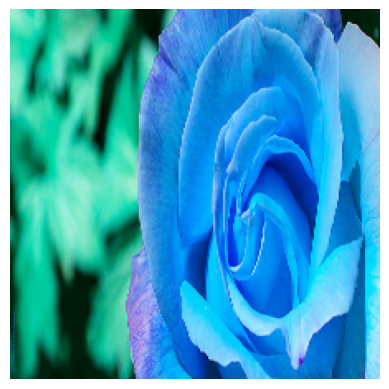

In [35]:
plt.axis('off')
plt.imshow(X[0])

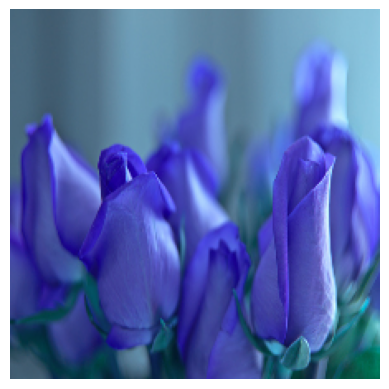

In [36]:
plt.axis('off')
plt.imshow(X[1])

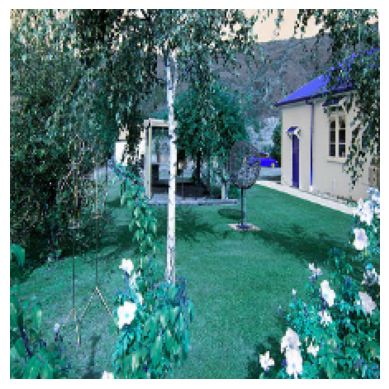

In [37]:
plt.axis('off')
plt.imshow(X[2])

In [38]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted


1/1 [==============================] - 1s 1s/step


array([795, 795, 795])

# lets take the predefined trining model

In [39]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) # here trainable is nothing but the freeze layers

In [40]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)